## Notebook to examine differential expression in developing scRNAseq data

In [6]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import pickle

In [90]:
# Load in AnnData object
devData = sc.read("../Data/devData.h5ad")

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [91]:
# Load most up to date cluster codes
clCodes = pd.read_feather("../Data/cluster_results.feather")
clCodes = clCodes.rename(columns={'id': 'sample_id', 'clusterData.cl.result.cl': 'cl'})
clCodes.set_index('sample_id',inplace=True)

# Combine cluster code w/ AnnData object
devData.obs = devData.obs.merge(clCodes,how='inner',left_index=True,right_index=True,validate = "1:1")

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


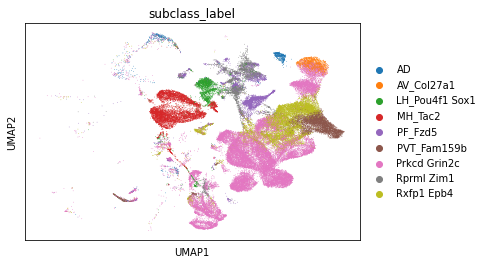

In [4]:
# Index by cell class
gluData = devData[devData.obs.class_label == "Glutamatergic"]
sc.pl.umap(gluData, color="subclass_label")

In [5]:
# Dispense the number of cells within each subclass
gluTypes = gluData.obs.subclass_label.unique()
pd.DataFrame([sum(gluData.obs.subclass_label == name) for name in gluTypes], index = gluTypes)

,0
MH_Tac2,6592
Rxfp1 Epb4,10468
Rprml Zim1,3605
Prkcd Grin2c,29016
PVT_Fam159b,5003
AD,861
LH_Pou4f1 Sox1,2224
PF_Fzd5,3704
AV_Col27a1,1335


In [5]:
# How many total clusters are there?
len(gluData.obs["cluster_label"].unique())

106

## Evaluate differentially expressed genes

In [6]:
# Remove clusters with fewer than 10 cells
gluTypes = gluData.obs.cluster_label.unique()
gluCounts = pd.DataFrame({'counts' : [sum(gluData.obs.cluster_label == name) for name in gluTypes]}, index = gluTypes)
gluRemove = gluCounts[gluCounts.counts < 10]
for cl in gluRemove.index:
    gluData = gluData[gluData.obs["cluster_label"] != cl]

In [7]:
# Rank differentially expressed genes by comparing subclasses to all other subclass clusters
sc.tl.rank_genes_groups(gluData, 'cluster_label', method='wilcoxon',pts=True)

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: Perf

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: Perfo

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: P

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: Perfo

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: P

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:409: Perform

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: Perf

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\scanpy\tools\_rank_genes_groups.py:409: Perform

In [14]:
# Save DE data
clusterWilcoxon = gluData.uns["rank_genes_groups"]

with open("../Data/wilcoxon_rank_genes.pickle", "wb") as f:
    pickle.dump(clusterWilcoxon,f)

In [ ]:
# Load DE data
with open("../Data/wilcoxon_rank_genes.pickle", "rb") as f:
    clusterWilcoxon = pickle.load(f)
    
gluData.uns["rank_genes_groups"] = clusterWilcoxon

## Subclass specific UMAPs

C:\Users\mathew.summers\Anaconda3\envs\scanpy1.9\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


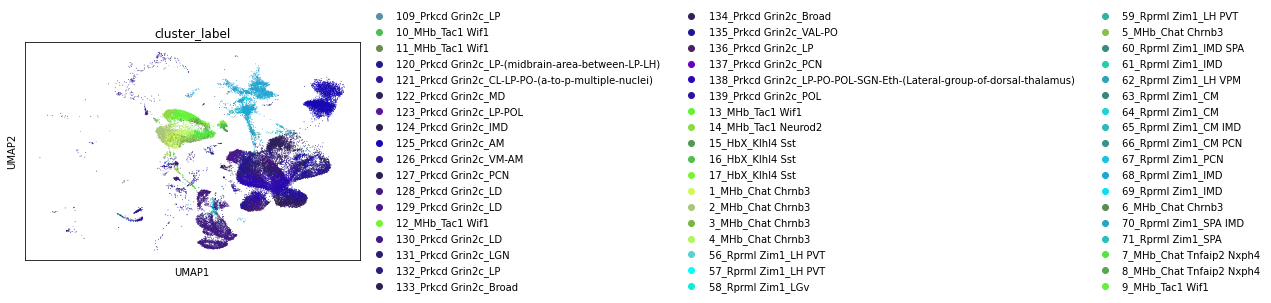

In [14]:
# Plot cluster umap, using cluster colors
subTypes = devData.obs["subclass_label"].unique()
sampleData = devData[devData.obs["subclass_label"].isin(subTypes[[0, 3, 4]])]
color_dict = dict(zip(sampleData.obs["cluster_label"],sampleData.obs["cluster_color"]))
# plt.figure(figsize=(40, 40), dpi=150)
sc.pl.umap(sampleData, color="cluster_label",palette =color_dict)
# sc.pl.umap(devData, color="cluster_label")

## Look at tuned expression within a subclass / cluster

In [6]:
def geneTuning(gene, groupby = "fb_subclass_label"):
    # Function to get a tuning index for gene expression. Likely ways to make this run faster

    # Get average expression of that gene within a subclass
    expDict = {}
    cellTypes = gluData.obs[groupby]
    for name in np.unique(gluTypes):
        expDict[name] = float(np.mean(gluData[cellTypes == name,gene].X))
    
    tIndx = max(list(expDict.values())) / sum(list(expDict.values()))
    return tIndx, expDict
    

In [ ]:
with open("../Results/Gene Panels/scGeneFit_p11_p14_panel.json", "r") as f:
    gfPanel = json.load(f)
    
with open("../Results/Gene Panels/PROPOSE_p11_p14_panel.json", "r") as f:
    prPanel = json.load(f)
    
with open("../Results/Gene Panels/activeSVM_p11_p14_panel.json", "r") as f:
    svPanel = json.load(f)
    
with open("../Results/Gene Panels/Marcus_p11_p14_panel.json", "r") as f:
    mrPanel = json.load(f)

## Look for specific genes within data

In [33]:
# Look for gene names
# import re
p  = re.compile('Pcdh', re.IGNORECASE)
myList = gluData.var_names
newList = list(filter(p.search, myList))
newList

['Pcdh10',
 'Pcdh18',
 'Pcdh7',
 'Pcdh15',
 'Pcdh8',
 'Pcdh17',
 'Pcdh20',
 'Pcdh9',
 'Pcdha1',
 'Pcdha2',
 'Pcdha3',
 'Pcdha4',
 'Pcdha5',
 'Pcdha6',
 'Pcdha7',
 'Pcdha8',
 'Pcdha9',
 'Pcdha11',
 'Pcdha11 ENSMUSG00000102206',
 'Pcdha12',
 'Pcdhac1',
 'Pcdhac2',
 'Pcdhb1',
 'Pcdhb2',
 'Pcdhb3',
 'Pcdhb4',
 'Pcdhb5',
 'Pcdhb6',
 'Pcdhb7',
 'Pcdhb8',
 'Pcdhb9',
 'Pcdhb10',
 'Pcdhb11',
 'Pcdhb12',
 'Pcdhb13',
 'Pcdhb14',
 'Pcdhb15',
 'Pcdhb16',
 'Pcdhb17',
 'Pcdhb18',
 'Pcdhb19',
 'Pcdhb20',
 'Pcdhb21',
 'Pcdhb22',
 'Pcdhga1',
 'Pcdhga2',
 'Pcdhga3',
 'Pcdhgb1',
 'Pcdhga4',
 'Pcdhgb2',
 'Pcdhga5',
 'Pcdhga6',
 'Pcdhga7',
 'Pcdhgb4',
 'Pcdhga8',
 'Pcdhgb5',
 'Pcdhga9',
 'Pcdhgb6',
 'Pcdhga10',
 'Pcdhgb7',
 'Pcdhga11',
 'Pcdhga12',
 'Pcdhgc3',
 'Pcdhgc4',
 'Pcdhgc5',
 'Pcdh1',
 'Pcdh12',
 'Pcdh11x',
 'Pcdh19']

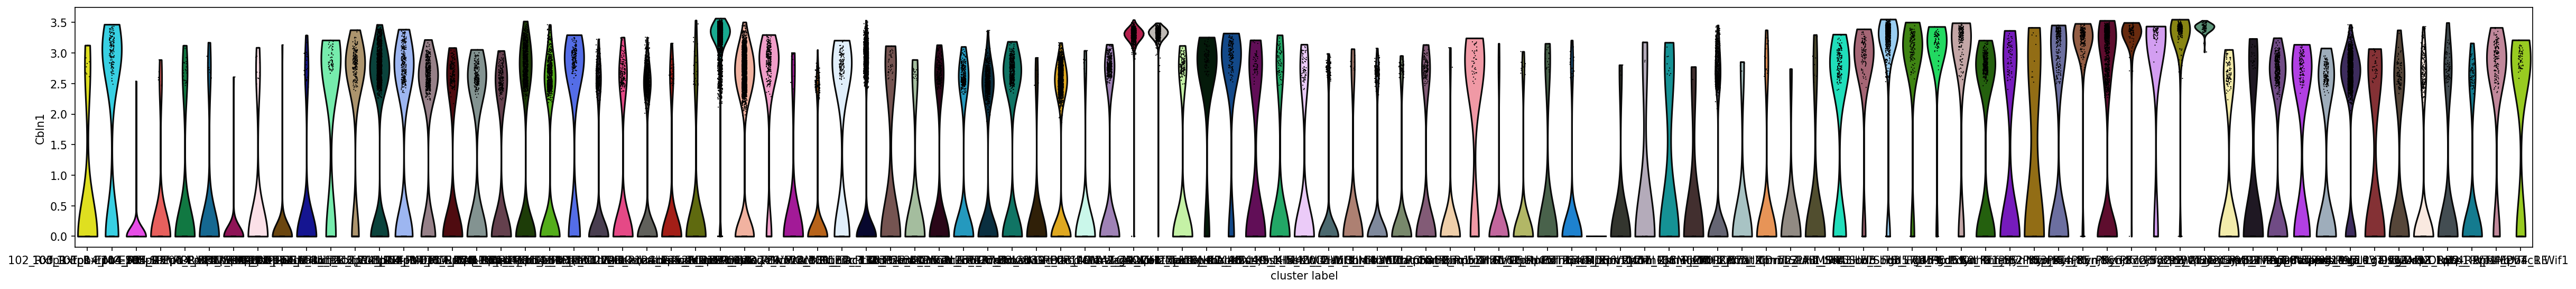

In [38]:
# Plot DE
plt.figure(figsize=(40, 4), dpi=150)
ax = plt.subplot(1,1, 1)
sc.pl.violin(gluData,"Cbln1",groupby="cluster_label", ax = ax)